# Fraud Detection: Random Forest Classification

<br>

## 1. Introduction

The purpose of this model is to classify wether or not a transaction is fraudulent. Fraudulent data is determined by the distance the transaction was made from the persons home; distance from last purchase; average purchase total; and if the person used a card, chip, pin or made the purchase at a repeat retailer.

The model employs RandomForest Classification to make these predictions. Random Forest Classification is a machine learning algorithm that uses an ensemble of decision trees to make predictions, particularly for classification tasks. It combines the predictions of multiple, uncorrelated decision trees to improve accuracy and robustness. 

To test the final model, execute `streamlit run app.py`. You can also run it via the deployed model [here]().

<br>

## 2. Data Overview

### Data Acquisition

The original data aqcuired from Kaggle can be accessed through the link provided below:
- [Download Data](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud)

### Key Features of the Dataset

- **distance_from_home** - the distance from home where the transaction happened.

- **distance_from_last_transaction** - the distance from last transaction happened.

- **ratio_to_median_purchase_price** - Ratio of purchased price transaction to median purchase price.

- **repeat_retailer** - Is the transaction happened from same retailer.

- **used_chip** - Is the transaction through chip (credit card).

- **used_pin_number** - Is the transaction happened by using PIN number.

- **online_order** - Is the transaction an online order.

- **fraud** - Is the transaction fraudulent.

<br>

## 3. Initial Data Exploration

In this section, the necessary libraries and datasets needed for analysis will be imported and initialized.

The following libraries are used:

- Library `pandas` will be required to work with data in tabular representation.

- Library `numpy` will be required to round the numerical data.

- Library `matplotlib`, `seaborn` will be required for data visualization.

- Library `sklearn` will be used to train the model.

- Library `joblit` will be used to export the model for deployment.

In [ ]:
# Libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import joblib
import warnings
%matplotlib inline

# Settings
sns.set_theme(style="darkgrid")
pd.set_option('display.max_rows', 10)

# Set up logging
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [70]:
# Import data and save it as DataFrame
data_df = pd.read_csv('../data/card_transdata.csv')

# Dimensions of the data
print(f'The data contains {data_df.shape[0]} records and {data_df.shape[1]} columns.')

# Datatypes of the data
print(f'\nThe data contains the following data types: \n{data_df.dtypes.value_counts()}')

# Display driver data
data_df.head()

The data contains 1000000 records and 8 columns.

The data contains the following data types: 
float64    8
Name: count, dtype: int64


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
# Rename target variable
data_copy = data_df.copy()
data_copy.rename({'fraud': 'labels'}, axis=1, inplace=True)
data_copy.head(1)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,labels
0,57.877857,0.31114,1.94594,1.0,1.0,0.0,0.0,0.0


<br>

## 4. Data Cleaning and Preprocessing

In this section, data pre-processing will be conducted by examining data types, addressing missing values, removing duplicates, analyzing measures of central tendency, and extracting features.

### 4.1 Missing Data

In [72]:
# Missing values
data_copy.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
labels                            0
dtype: int64

**CONCLUSION:**

The dataset contains no missing values, so no additional modifications are needed.

### 4.2 Duplicate Data

In [73]:
# Duplicate data
data_copy.duplicated().any().sum()

0

**CONCLUSION:** 

Only valid duplicates exist. Therefore, no further data transformation is necessary.

### 4.3 Transformation

In [74]:
# Data types
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   labels                          1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


**CONCLUSION:** 

All data are in the correct types and formats; therefore, no further data transformation is needed.

### 4.5 Outliers

Outliers can distort and mislead the analysis process, resulting in inaccurate predictions and insights. Therefore, addressing outliers is essential when preparing data for analysis or machine learning models. 

Generating summary statistics is a quick and effective way to assess whether a dataset contains outliers.

In [75]:
# Frequency analysis
for col in data_copy:
    print(f'Column{col}')
    print(data_copy[col].value_counts(), '\n')

Columndistance_from_home
distance_from_home
57.877857     1
17.696734     1
47.933214     1
48.300681     1
25.414372     1
             ..
145.704144    1
4.501861      1
17.443799     1
3.583736      1
58.108125     1
Name: count, Length: 1000000, dtype: int64 

Columndistance_from_last_transaction
distance_from_last_transaction
0.311140    1
3.640681    1
3.095558    1
3.273022    1
0.245656    1
           ..
3.680817    1
0.367765    1
0.841772    1
3.321236    1
0.318110    1
Name: count, Length: 1000000, dtype: int64 

Columnratio_to_median_purchase_price
ratio_to_median_purchase_price
1.945940    1
1.161855    1
0.607566    1
1.257822    1
1.846399    1
           ..
0.612613    1
0.491743    1
1.380752    1
0.967628    1
0.386920    1
Name: count, Length: 1000000, dtype: int64 

Columnrepeat_retailer
repeat_retailer
1.0    881536
0.0    118464
Name: count, dtype: int64 

Columnused_chip
used_chip
0.0    649601
1.0    350399
Name: count, dtype: int64 

Columnused_pin_number
use

In [76]:
# Summary statistics
data_copy.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,labels
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


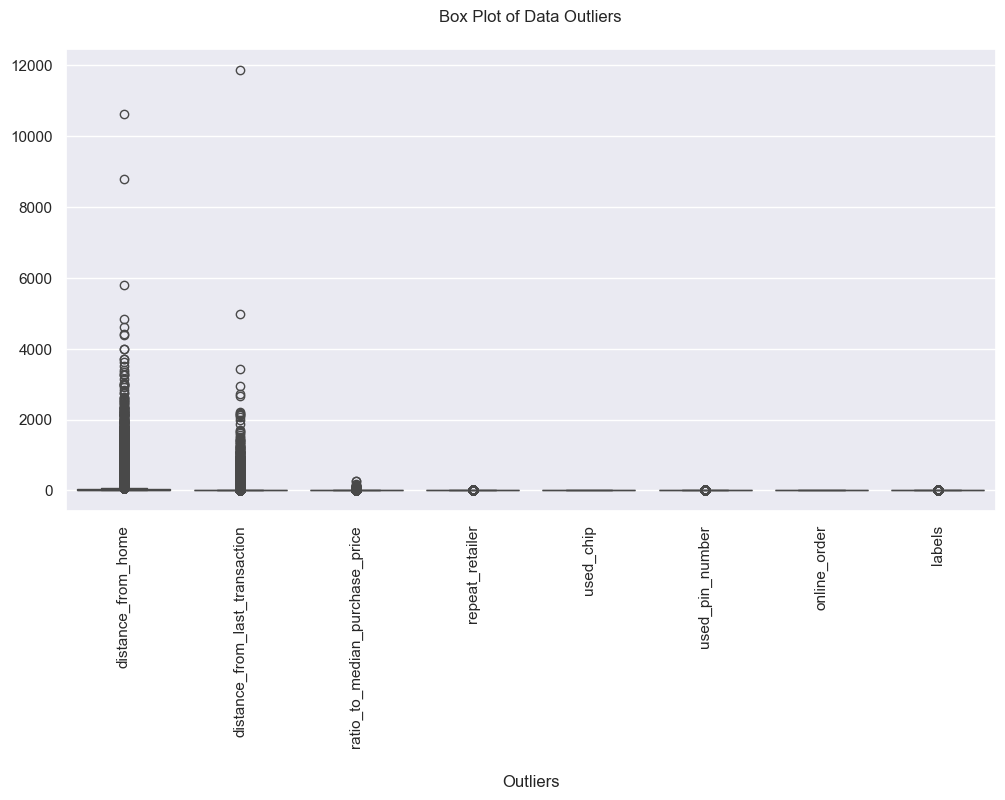

In [77]:
# Visualize with a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_copy)
plt.title('Box Plot of Data Outliers', pad=20)
plt.xticks(rotation=90)
plt.xlabel('Outliers', labelpad=20)
plt.show()

**CONCLUSION:**

Upon examining the distributions above, it is evident that there are a few distinct outliers. This means that data scaling and outlier removal is necessary, which will be performed after splitting our data for training. 

Data scaling will be essential to normalize the wide range of values across features, particularly for the distance measurements and ratio variables that span multiple orders of magnitude. Outlier removal will be implemented to create a cleaner training dataset that focuses on typical transaction patterns.

Critically, all preprocessing steps will be performed after splitting the data into training and testing sets. This sequencing is fundamental for avoiding data leakage, where information from the test set inadvertently influences model training.

<br>

## 5. Exploratory Data Analysis

In this section, we explore the dataset to understand the relationships, correlations, and distribution of key features.

labels
0.0    912597
1.0     87403
Name: count, dtype: int64
labels
0.0    91.2597
1.0     8.7403
Name: count, dtype: float64


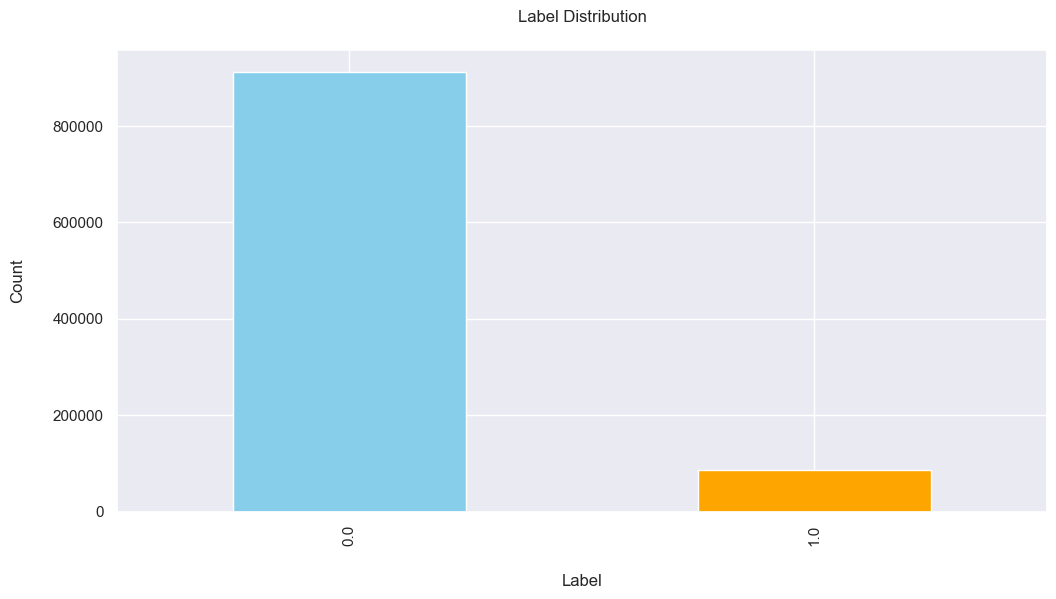

In [ ]:
# Distribution plot to check target balance
target_counts = data_copy['labels'].value_counts()
print(target_counts)
print(target_counts / len(data_copy) * 100) 
plt.figure(figsize=(12,6))
target_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Label Distribution', pad=20)
plt.xlabel('Label', labelpad=20)
plt.ylabel('Count', labelpad=20)
plt.show()

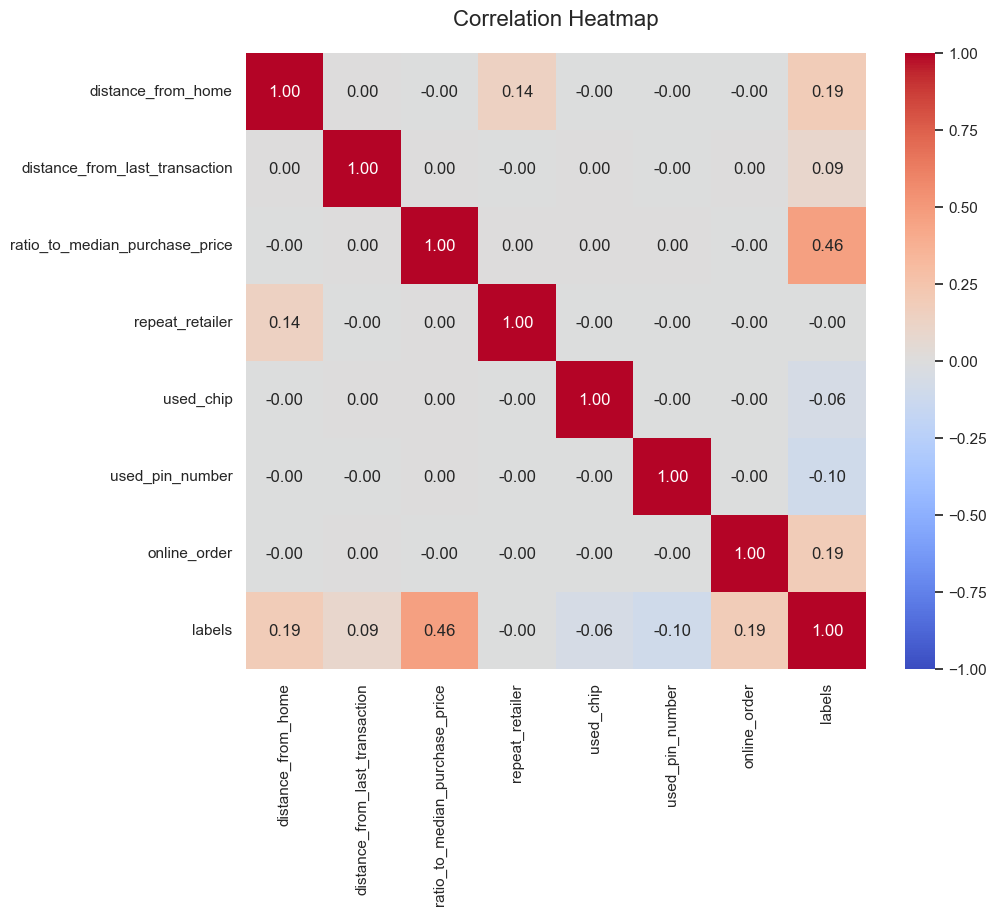

In [ ]:
# Correlation matrix to explore relationships
correlation_matrix = data_copy.select_dtypes(include=['int', 'float']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.show()

**CONCLUSION:**

- From the distribution, 91.3% of transactions are non-fraudulent while only 8.7% are fraudulent accurately describes a significant class imbalance. This imbalance is typical in fraud detection scenarios. We can apply SMOTE and use class balancing on our model to weight classes proportional to their frequency, effectively penalizing misclassification of the minority class.

- There are limited linear correlations between features in the dataset. The most significant positive correlation with fraudulent transactions is observed in `ratio_to_median_purchase_price` (0.47), indicating that unusually high purchase amounts relative to a customer's typical spending pattern are associated with fraud. Secondary positive correlations exist between `online_order`/`distance_from_home` (0.19) and fraud, suggesting that transactions occurring far from a customer's residence and conducted online carry elevated risk.

- Features that have lower linear correlations, such as `repeat_retailer`, `used_chip`, and `used_pin_number` indicate using chips, pins, or being a repeat customer leads to lower levels of fraud.

- Despite modest correlation coefficients, retaining all features is recommended as machine learning algorithms can identify sophisticated, non-linear patterns and feature interactions that traditional correlation analysis cannot detect.

<br>

## 6. Model Training & Evaluation

In this section, we will train the model using the provided data, enabling it to make precise and informed predictions based on the patterns and insights derived from the dataset. 

### 6.1 Feature Extraction

In [ ]:
# Shuffle data
data_copy.sample(frac=1, random_state=42)

# Set features and target
X = data_copy.drop(columns=['labels']) 
y = data_copy['labels']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### 6.2 Training Data Preprocessing

In [ ]:
# Remove outliers from training data
def remove_outliers(X_train, y_train, cols):
    Q1 = X_train[cols].quantile(0.25)
    Q3 = X_train[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = ~((X_train[cols] < lower) | (X_train[cols] > upper)).any(axis=1)
    return X_train[mask], y_train[mask]

# Apply
cols_to_filter = ['distance_from_home', 'distance_from_last_transaction']
X_train_clean, y_train_clean = remove_outliers(X_train, y_train, cols_to_filter)

In [ ]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_clean, y_train_clean)

### 6.3 Model Training

In [ ]:
# Train model
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced')

### 6.4 Model Evaluation

In [ ]:
# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.98
Precision: 1.00
Recall: 0.72


**CONCLUSION:**

**Accuracy: 0.98**

- 98% of all predictions (both fraud and non-fraud) are correct.

- In highly imbalanced datasets like the (where fraud is rare), accuracy can be misleading.

**Precision: 1.00**

- 100% of transactions the model flags as fraudulent are actually fraudulent.

- This means zero false positives - the model never incorrectly flags legitimate transactions

**Recall: 0.72**

- The model correctly identifies 72% of actual fraud cases.

- This means 28% of fraudulent transactions go undetected.

- With further training, and more fraudulent data, the model can improve. The model can also be complemented with rule-based systems for high-value transactions. This will be done in the actual code-base.

With these results, the model is ready for deployment.

<br>

## 7. Model Deployment

In this section, the trained model will be exported for future use. This model will be deployed to Streamlit, allowing us to test and interact with it through an interface.

In [85]:
# Save the trained model to a file
joblib.dump(model, 'fraud_detection_model.pkl')

['fraud_detection_model.pkl']

**CONCLUSION:**

With the model exported, it can now be deployed using streamlit. This is done in a seperate file, called `app.py`, which can find within the project in the GitHub repository.